#### Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Load data from file "cars.csv" and look at the first few rows

In [2]:
#CODE HERE
df = pd.read_csv('cars.csv')
df.head()

,Unnamed: 0,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


#### Check what is the shape of the data and what are the  types of the variables.

In [3]:
#CODE HERE
print(df.shape)
print(df.dtypes)

(11092, 16)
Unnamed: 0             int64
Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object


#### What are the 10 most popular makes of cars?

In [4]:
#CODE HERE
topCars = df.value_counts('Make')
topCars.nlargest(10)


Make
Chevrolet     1075
Ford           811
Toyota         713
Volkswagen     564
Nissan         541
Dodge          528
GMC            482
Honda          431
Cadillac       396
Mazda          392
dtype: int64

#### Make a bar plot showing the number of different cars by make. Add labels to both axes and a title.

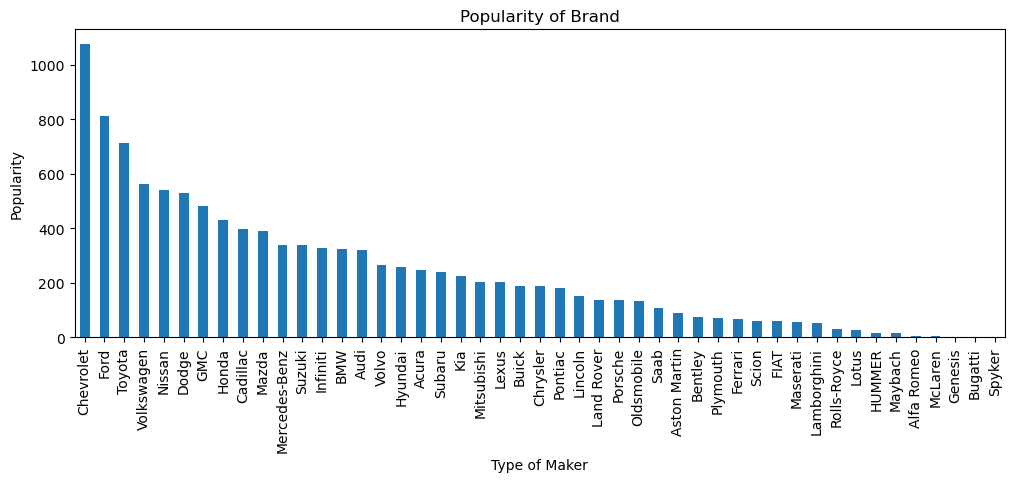

In [5]:
#CODE HERE
plt.rcParams['figure.figsize']=[12,4]
topCars.plot(kind='bar')
plt.xticks(rotation=90)
plt.xlabel('Type of Maker')
plt.ylabel('Popularity')
plt.title('Popularity of Brand')
plt.show()

#### How many different models of FIAT are recorded in the dataset?

In [6]:
df.loc[df['Make']=='FIAT']['Model'].value_counts().nunique()

4

#### Make a pie chart showing the distribution of different FIAT models in the dataset. Add a title and a legend.

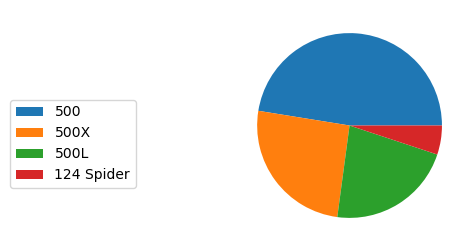

In [7]:
#CODE HERE
fiatCars = df.loc[df['Make']=='FIAT']['Model'].value_counts()
plt.rcParams['figure.figsize']=[6,3]
plt.pie(fiatCars)
plt.legend(fiatCars.index,loc='lower left')
plt.legend(fiatCars.index,loc='lower left',bbox_to_anchor=(-1,0.2))
plt.show()

#### What years are the oldest and newest cars in the dataset?

In [8]:
print("oldest car: ")
print(df['Year'].min())
print("Newest car: ")
print(df['Year'].max())

oldest car: 
1990
Newest car: 
2017


#### Make a line plot of the number of cars by year. Add axis labels and grid lines.

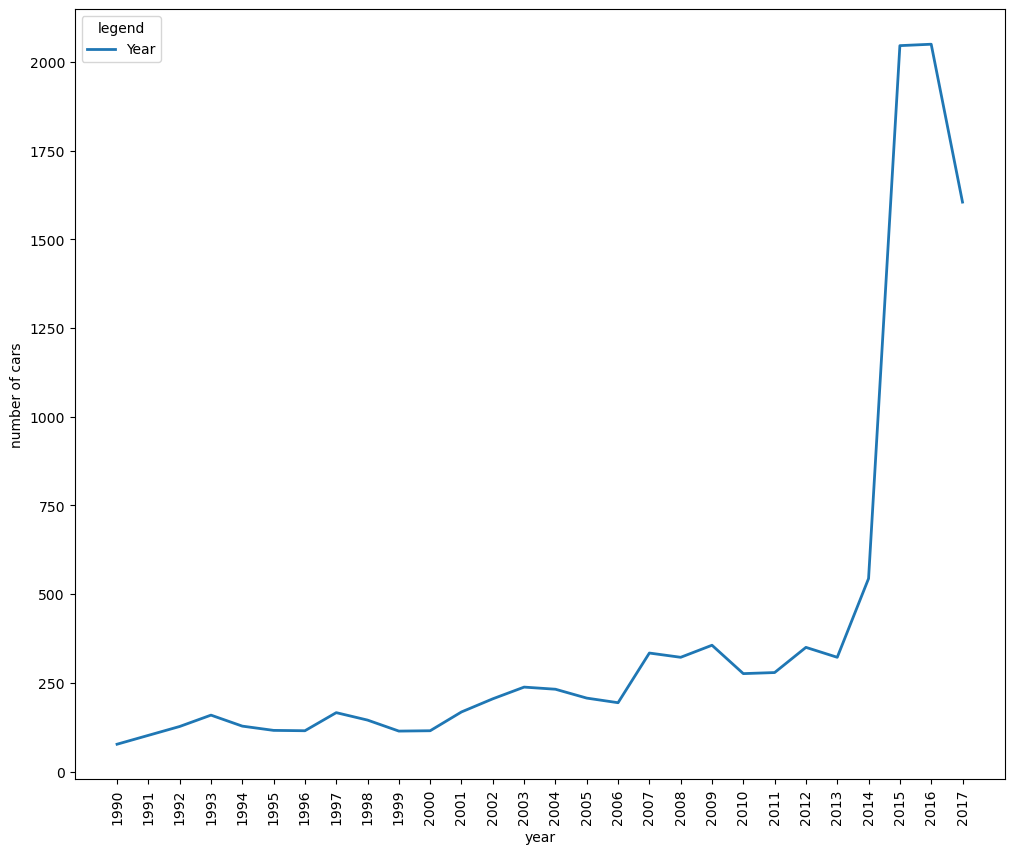

In [9]:
years = df['Year'].value_counts().sort_index()
years.plot(kind = 'line',figsize = [12,10],linewidth = 2)
plt.legend(title = "legend")
plt.xticks(years.index,rotation = 90)
plt.xlabel('year')
plt.ylabel('number of cars')
plt.show()

#### There are several numerical variables. Calculate the correlation coefficients between them. 

In [10]:
corrcars= df.corr()
corrcars

/var/folders/2y/yvh1znjd4fgb59l_s7m1s_3c0000gn/T/ipykernel_91587/945424575.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrcars= df.corr()


,Unnamed: 0,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
Unnamed: 0,1.000000,0.058771,0.011291,0.068359,0.149626,-0.137294,-0.072933,-0.084531,-0.024098
Year,0.058771,1.000000,0.337207,-0.026926,0.245804,0.265521,0.220037,0.086693,0.209315
Engine HP,0.011291,0.337207,1.000000,0.788325,-0.128704,-0.423809,-0.474851,0.041352,0.658987
Engine Cylinders,0.068359,-0.026926,0.788325,1.000000,-0.147885,-0.614795,-0.634509,0.042393,0.552042
Number of Doors,0.149626,0.245804,-0.128704,-0.147885,1.000000,0.116846,0.137381,-0.059199,-0.145690
highway MPG,-0.137294,0.265521,-0.423809,-0.614795,0.116846,1.000000,0.842834,-0.024804,-0.207796
city mpg,-0.072933,0.220037,-0.474851,-0.634509,0.137381,0.842834,1.000000,-0.007093,-0.232722
Popularity,-0.084531,0.086693,0.041352,0.042393,-0.059199,-0.024804,-0.007093,1.000000,-0.048438
MSRP,-0.024098,0.209315,0.658987,0.552042,-0.145690,-0.207796,-0.232722,-0.048438,1.000000


#### The variables 'highway MPG' and 'cty mpg' have a high correlation. Make a plot showing two boxplots side by side for the two varaibles. 

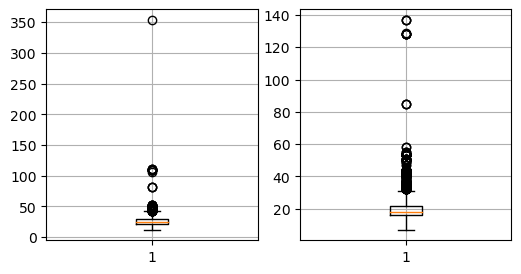

In [11]:
#CODE HERE
fig,(ax1,ax2)=plt.subplots(1,2)
ax1.boxplot(df['highway MPG'])
ax1.grid(True)
ax2.boxplot(df['city mpg'])
ax2.grid(True)
plt.show()



#### Both variables have several outliers. Use Tukey's method to remove outliers that are more than 1.5 times the IQR above the third quartile from both variables and then redo the boxplots.Change the xticks from [1,2] to ['highway','city'] and label the y axis.

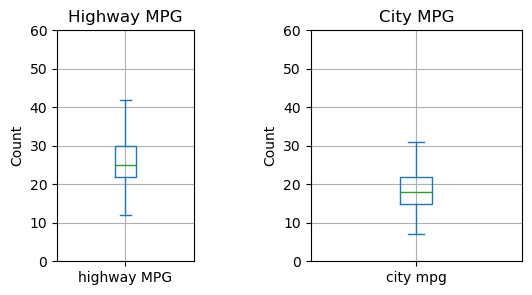

In [12]:
hWq1 , Hway_q3 = np.percentile(df['highway MPG'],[25,75])
hWIqr = (Hway_q3 - hWq1)

hWTuk = Hway_q3 + (1.5 * hWIqr)
city_q1 , city_q3 = np.percentile(df['city mpg'],[25,75])
cityIQR = (city_q3 - city_q1)
cityTUK = city_q3 + (1.5 * cityIQR)

df = df[~(df['highway MPG'] > hWTuk)]
df = df[~(df['city mpg'] > cityTUK)]

plt.subplot(1,3,1)
df['highway MPG'].plot(kind='box', title='Highway MPG')
plt.grid()
plt.ylim(0, 60)
plt.ylabel('Count')

plt.subplot(1,2,2)
df['city mpg'].plot(kind='box', title='City MPG')
plt.ylim(0, 60)
plt.ylabel('Count')
plt.grid()
plt.show()

#### What is the most striking difference between the two boxplots? Why?

Your answer here: we can see that in the highway the MGP is higher then the city MGP

#### Make a scatter plot for the price of a car (MSRP) against the variable with the highest correlation with the price.

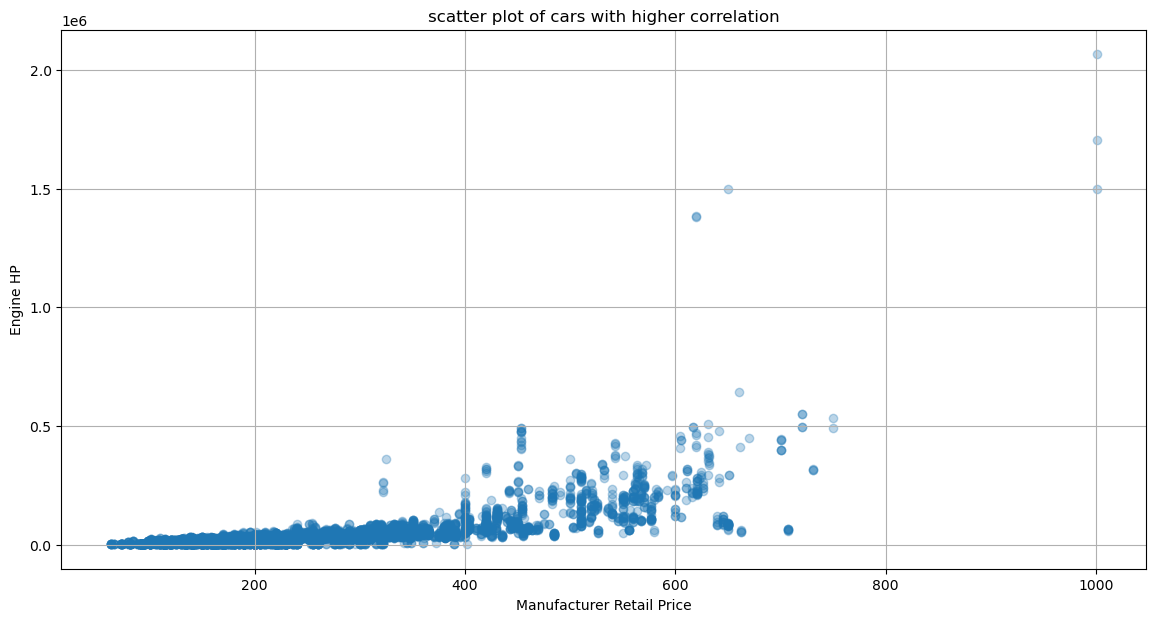

In [13]:
#CODE HERE
plt.figure(figsize=(14,7))
plt.scatter(df['Engine HP'],df['MSRP'],alpha = 0.3)
plt.grid(True)
plt.title('scatter plot of cars with higher correlation')
plt.xlabel('Manufacturer Retail Price')
plt.ylabel('Engine HP')
plt.show()

#### Regress the price on Engine HP and add the regression line to the plot. Print the MSE and R^2.

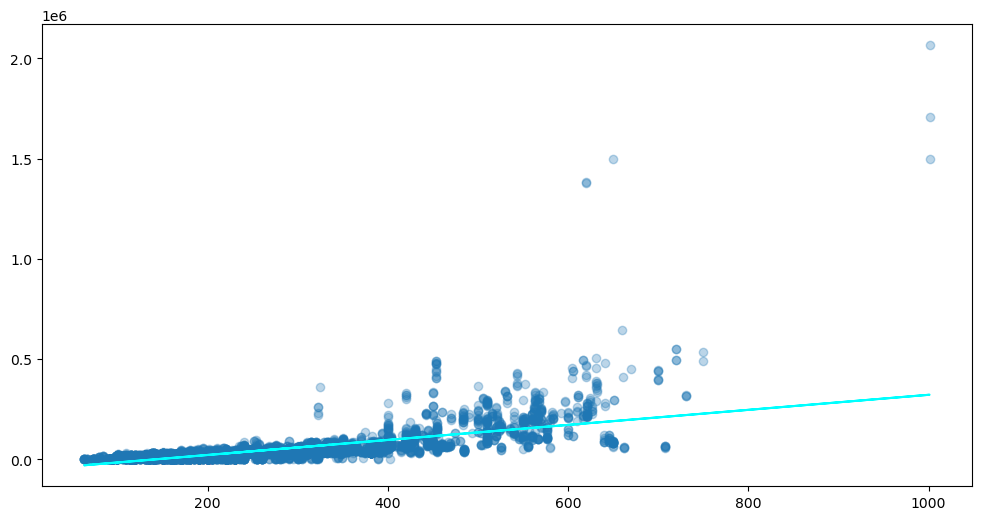

In [14]:
#import LinearRegression and instantiate class
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
#CODE HERE
reg = LinearRegression()
X = df['Engine HP']
y = df['MSRP']
X = np.vstack([X,np.ones(len(X))]).T
reg.fit(X,y)
a,b = (reg.coef_[0], reg.intercept_)
#print mse and r2
plt.rcParams['figure.figsize'] = (12,6)
plt.scatter(x = df['Engine HP'],y=df['MSRP'],alpha = 0.3)
plt.plot(df['Engine HP'],(a*df['Engine HP'])+b,color = 'cyan')
plt.show()

In [15]:
mse = mean_squared_error(y,reg.predict(X))
r2 = r2_score(y,reg.predict(X))
print(' mse = '+str(mse)+' r^2 = ' + str(r2))

 mse = 2193334819.0336065 r^2 = 0.4378030893506337


#### The variable 'Engine Cylinders' has the next highest correlation with 'MSRP'.  Remake the scatter plot adding an argument c=df['Engine Cylinders'] to colour the plot by the number of cylinders.

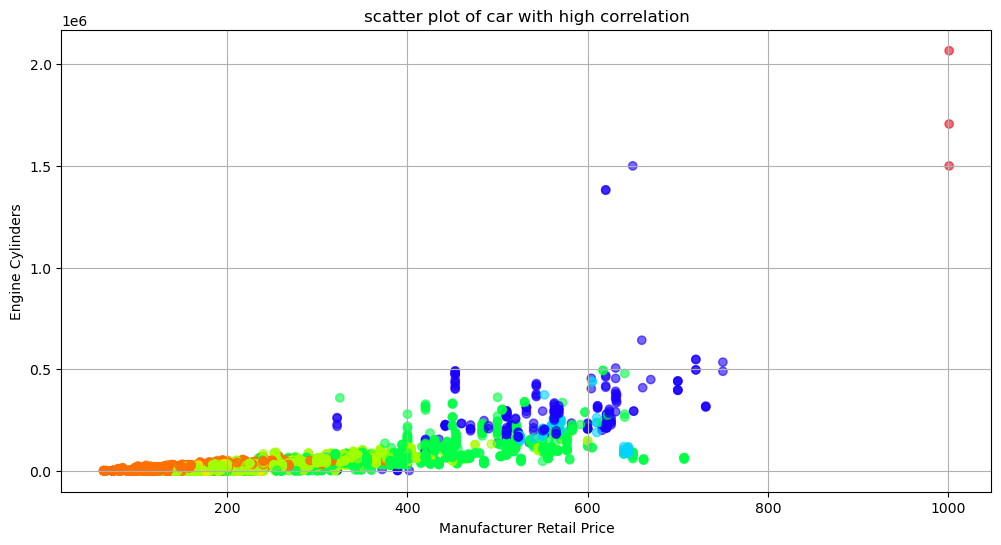

In [16]:
x = df['MSRP']
y = df['Engine HP']
colors_engine = df['Engine Cylinders']
plt.scatter(y,x,c = colors_engine,cmap = 'hsv',alpha = 0.6)
plt.title('scatter plot of car with high correlation')
plt.xlabel('Manufacturer Retail Price')
plt.ylabel('Engine Cylinders')
plt.grid(True)
plt.show()

#### It looks like the price is dependent on both Engine HP and Engine Cylinders. Regress MSRP on the two variables. Print the coefficients, intercept , MSE and R^2.

In [17]:
X = df[['Engine HP','Engine Cylinders']]
y = df['MSRP']
lreg = LinearRegression()
lreg.fit(X,y)
y_pred = lreg.predict(X)

print("coeffiencs: ", str(lreg.coef_))
print("intercept:  ", str(lreg.intercept_))
print("MSE:        ", str(mean_squared_error(y,y_pred)))
print("R^2:        ", str(r2_score(y,y_pred)))

coeffiencs:  [ 333.14771638 3367.99394169]
intercept:   -62384.32043466844
MSE:         2179987494.4157624
R^2:         0.4412242836892585
